# <center> <span style='color:#00008b '> Maximizing Revenue and Profit of Hotel using <br> Machine Learning Techniques <br> (Group 7)</span>

 # Outline

1. [INTRODUCTION](#1.-INTRODUCTION)
2. [PROBLEM STATEMENT](#2.-PROBLEM_STATEMENT)
3. [OBJECTIVE](#3.-OBJECTIVE)
4. [DATA PRE-PROCESSING](#4.-DATA_PRE-PROCESSING)
5. [EDA](#5.-EDA)
6. [FEATURE ENGINEERING](#6.-FeatureEngineering)
7. [MODELING](#7.-MODELING)
8. [DISCUSSION](#8.-DISCUSSION)
9. [CONCLUSION](#9.-CONCLUSION)

![Exterior%202_1920.jpg](attachment:Exterior%202_1920.jpg)

In [20]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.peninsula.com/-/media/misc/pen8/2022-06/misc_202206/exterior-2_1920.jpg")

# 1. INTRODUCTION

The hotel industry is an extremely competitive business, and for hotel owners and operators, maximizing revenue and profit is a top goal. The target users of this research project include hotel owners, operators, revenue managers, marketing teams, and decision-makers within the hotel industry. Implementing machine learning techniques also allows hotels to gain a competitive edge by making data-driven decisions, responding quickly to market changes, and offering personalized experiences that attract and retain customers. 

# 2. PROBLEM_STATEMENT

Hotels strive to maximize revenue and profitability while providing an excellent customer experience. While pricing strategies are a key component of revenue management, other factors such as room type, minimum stay and leadtime also play a significant role in maximizing profitability.

Therefore,  identifying the key factors that impact hotel bookings is crucial goals for hotels by leveraging data from various sources such as operational data, cancellation rate and market trends.


# 3. OBJECTIVE

The project aims to help hotel owner to maximize the revenue and profitability of the hotels by identify the key factors that impact hotel bookings and predict the cancellation bookings.

# 4. DATA_PRE-PROCESSING

In [ ]:
# importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## READING FILE


In [ ]:
H1 = pd.read_csv('H1.csv')

# print(H1.info())


In [ ]:
H2 = pd.read_csv('H2.csv')
# print(H2.info())

### HANDLING MISSING DATA
<p> Handling missing data is an essential step in a machine learning project because it can affect the accuracy and effectiveness of the final model. Missing data can occur for various reasons such as incomplete surveys, data entry errors, or sensor malfunction.

If missing data is not handled properly, it can lead to biased or inaccurate results, which can have serious consequences in many applications, such as medical diagnosis, financial forecasting, or fraud detection. The presence of missing data can also affect the performance of many machine learning algorithms, which may require complete and consistent data to work effectively. </p>

<p>By using the <strong>isna()</strong> function in Python, we can identify the number of missing values in each column for each dataset by summing the resulting Boolean values. This allows us to quickly and easily assess the extent of missing data in our dataset, which is an important step in data cleaning and preprocessing. Once we have identified the columns with missing data, we can then decide on the best approach for handling the missing values, such as imputation or removal, depending on the specific requirements of our analysis.<p>
CHECKING FOR MISSING DATA FOR HOTEL 1 AND HOTEL 2


In [ ]:
H1.isnull().sum()
H2.isnull().sum()


IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

Its apparent that there is missing data in hotel 1 the country column there is 464 missing value hotel 2 contain 24 missing value in the country column and 4 in the children.

 ### Filling missing value

the missing data in hotel 1 :
- we can replace the NA values with "Unknown" in the country column

For hotel 2: we have two columns with missing data:

- replace the NA values with "Unknown" for the country column
- replace the NA values with mode in the column children column

In [ ]:
H1['Country'].fillna("Unknown", inplace=True)

H2['Country'].fillna("Unknown", inplace=True)


In [ ]:
mode_value = H2['Children'].mode()[0]
H2['Children'].fillna(mode_value, inplace=True)

In [ ]:
print(H1.isnull().sum(axis=0))
print(H2.isnull().sum(axis=0))

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
Company                        0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
Reservatio

### Whitespace Cleaning in Text Data
<p>
Removing Whitespace in 'Meal', 'ReservedRoomType', 'AssignedRoomType', and 'DepositType' Fields for Consistency and Accurate Data Analysis

In this case, removing whitespace in these fields is important for consistency and accuracy of the data analysis. White spaces can cause issues with grouping and aggregation operations, and may also result in inaccurate calculations and analysis if not addressed properly. Therefore, it's necessary to remove the whitespace in these fields to ensure consistency and accuracy in the dataset.

</p>

<p>
By using the iloc() method, we are able to identify that certain values in the dataset contain whitespace. This may occur due to various reasons such as data entry errors, formatting issues or inconsistent data sources. Cleaning the whitespace in text fields is important to ensure consistency in data analysis and machine learning models.

</p>

In [ ]:
def clean_whitespace(df, columns):
    for col in columns:
        df[col] = df[col].apply(lambda x: x.strip())
    return df

<p>
The <strong>clean_whitespace()</strong> takes a dataframe df and a list of column names columns as input parameters. It then iterates through each column in the list columns and applies the strip() method to each value in the column using the apply() method with a lambda function. The strip() method removes any whitespace characters, such as spaces or tabs, from the beginning and end of a string.

This process helps to ensure that the data is consistent and removes any unintentional white spaces that may cause issues with data analysis or manipulation.
</p>

In [ ]:
H1 = clean_whitespace(H1, ['Meal', 'ReservedRoomType', 'AssignedRoomType', 'DepositType', 'Company','Agent'])
H2 = clean_whitespace(H2, ['Meal', 'ReservedRoomType', 'AssignedRoomType', 'DepositType', 'Company', 'Agent'])

checking if it contain excess spaces

In [ ]:
H1.iloc[0]

IsCanceled                              0
LeadTime                              342
ArrivalDateYear                      2015
ArrivalDateMonth                     July
ArrivalDateWeekNumber                  27
ArrivalDateDayOfMonth                   1
StaysInWeekendNights                    0
StaysInWeekNights                       0
Adults                                  2
Children                                0
Babies                                  0
Meal                                   BB
Country                               PRT
MarketSegment                      Direct
DistributionChannel                Direct
IsRepeatedGuest                         0
PreviousCancellations                   0
PreviousBookingsNotCanceled             0
ReservedRoomType                        C
AssignedRoomType                        C
BookingChanges                          3
DepositType                    No Deposit
Agent                                NULL
Company                           

# 5. EDA

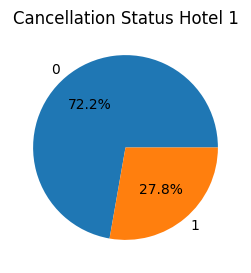

In [ ]:
#looking at cancellation in hotel 1
cancel_counts = H1['IsCanceled'].value_counts()

# Creating a Pie Chart
plt.figure(figsize=(6, 3))
plt.pie(cancel_counts, labels=cancel_counts.index, autopct='%1.1f%%')
plt.title('Cancellation Status Hotel 1')
plt.show()

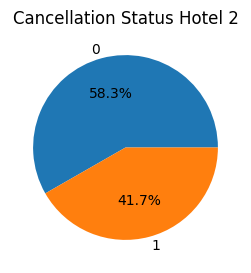

In [ ]:
#looking at cancellation in hotel 2
cancel_counts = H2['IsCanceled'].value_counts()

# Creating a Pie Chart
plt.figure(figsize=(6, 3))
plt.pie(cancel_counts, labels=cancel_counts.index, autopct='%1.1f%%')
plt.title('Cancellation Status Hotel 2')
plt.show()

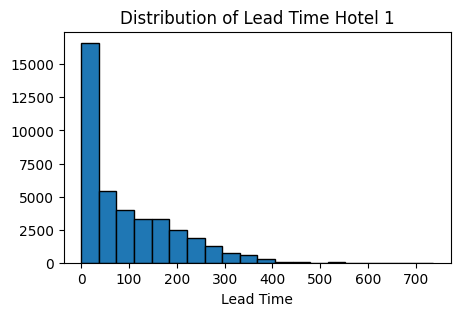

In [ ]:
plt.figure(figsize=(5, 3))
plt.hist(H1['LeadTime'], bins=20, edgecolor='black')
plt.xlabel('Lead Time')
plt.title('Distribution of Lead Time Hotel 1')
plt.show()


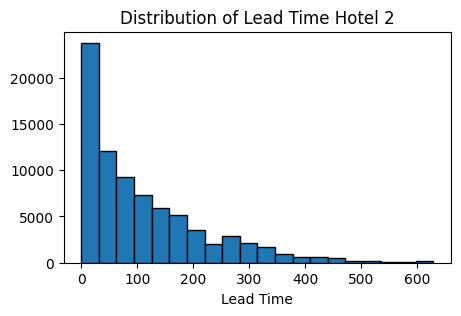

In [ ]:
plt.figure(figsize=(5, 3))
plt.hist(H2['LeadTime'], bins=20, edgecolor='black')
plt.xlabel('Lead Time')
plt.title('Distribution of Lead Time Hotel 2')
plt.show()

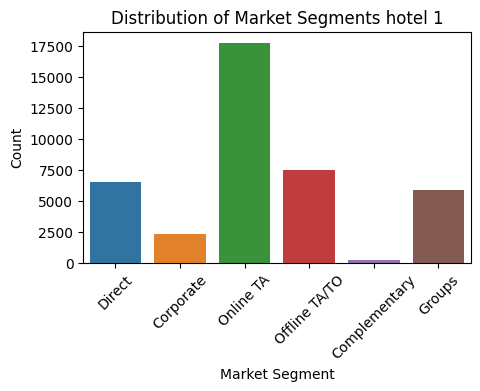

In [ ]:
plt.figure(figsize=(5, 3))
sns.countplot(data=H1, x='MarketSegment')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.title('Distribution of Market Segments hotel 1')
plt.xticks(rotation=45)
plt.show()

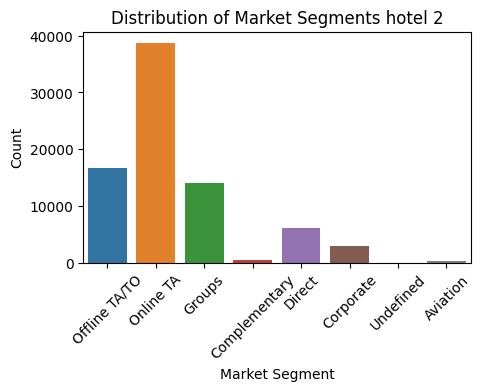

In [ ]:
plt.figure(figsize=(5, 3))
sns.countplot(data=H2, x='MarketSegment')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.title('Distribution of Market Segments hotel 2')
plt.xticks(rotation=45)
plt.show()

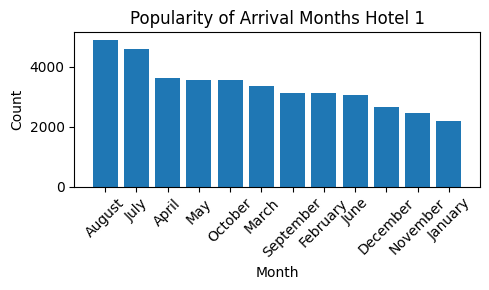

In [ ]:

month_counts = H1['ArrivalDateMonth'].value_counts()
sorted_counts = month_counts.sort_values(ascending=False)
# Bar Plot
plt.figure(figsize=(5, 3))
plt.bar(sorted_counts.index, sorted_counts.values)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Popularity of Arrival Months Hotel 1')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the spacing between labels if needed
plt.show()


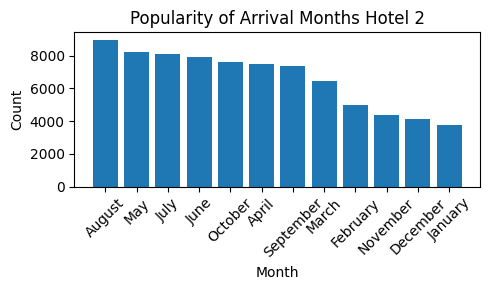

In [ ]:
month_counts = H2['ArrivalDateMonth'].value_counts()
sorted_counts = month_counts.sort_values(ascending=False)
# Bar Plot
plt.figure(figsize=(5, 3))
plt.bar(sorted_counts.index, sorted_counts.values)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Popularity of Arrival Months Hotel 2')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the spacing between labels if needed
plt.show()

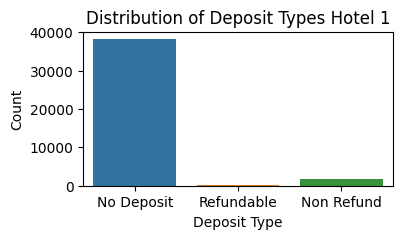

In [ ]:
plt.figure(figsize=(4, 2))
sns.countplot(data=H1, x='DepositType')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.title('Distribution of Deposit Types Hotel 1')
plt.show()

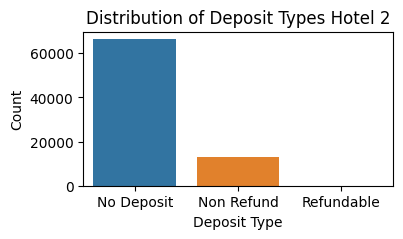

In [ ]:
plt.figure(figsize=(4, 2))
sns.countplot(data=H2, x='DepositType')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.title('Distribution of Deposit Types Hotel 2')
plt.show()


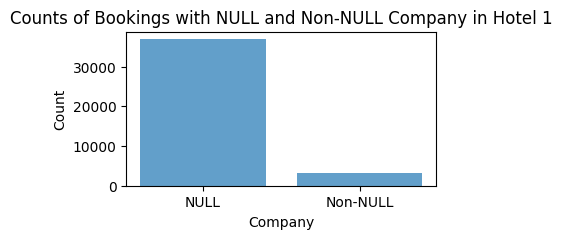

In [ ]:
# Grouping companies by NULL and non-NULL values
null_counts = (H1['Company'] == 'NULL').sum()
non_null_counts = (H1['Company'] != 'NULL').sum()
# Plotting the counts
plt.figure(figsize=(4, 2))
plt.bar(['NULL', 'Non-NULL'], [null_counts, non_null_counts], alpha=0.7)
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Counts of Bookings with NULL and Non-NULL Company in Hotel 1')
plt.show()



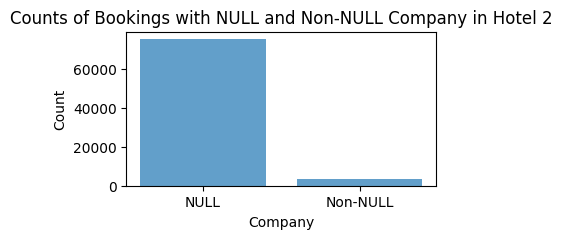

In [ ]:
# Grouping companies by NULL and non-NULL values
null_counts = (H2['Company'] == 'NULL').sum()
non_null_counts = (H2['Company'] != 'NULL').sum()
# Plotting the counts
plt.figure(figsize=(4, 2))
plt.bar(['NULL', 'Non-NULL'], [null_counts, non_null_counts], alpha=0.7)
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Counts of Bookings with NULL and Non-NULL Company in Hotel 2')
plt.show()



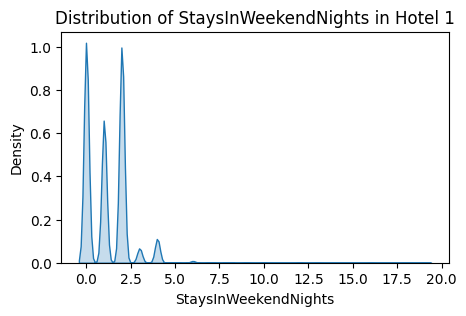

In [ ]:
# Plotting StaysInWeekendNights using Kernel Density Estimate (KDE) plot for Hotel 1
plt.figure(figsize=(5, 3))
sns.kdeplot(data=H1, x='StaysInWeekendNights', fill=True)
plt.xlabel('StaysInWeekendNights')
plt.ylabel('Density')
plt.title('Distribution of StaysInWeekendNights in Hotel 1')
plt.show()



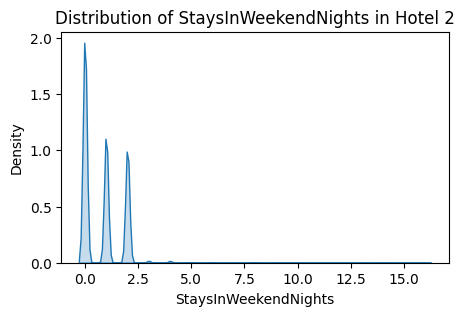

In [ ]:
# Plotting StaysInWeekendNights using Kernel Density Estimate (KDE) plot for Hotel 2
plt.figure(figsize=(5, 3))
sns.kdeplot(data=H2, x='StaysInWeekendNights', fill=True)
plt.xlabel('StaysInWeekendNights')
plt.ylabel('Density')
plt.title('Distribution of StaysInWeekendNights in Hotel 2')
plt.show()


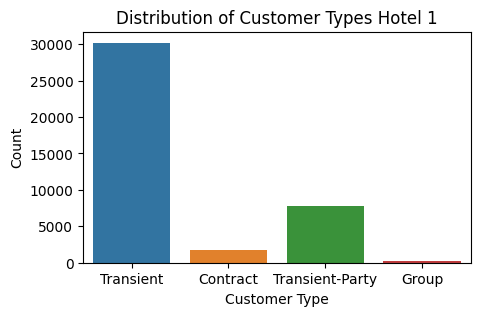

In [ ]:
plt.figure(figsize=(5, 3))
sns.countplot(data=H1, x='CustomerType')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.title('Distribution of Customer Types Hotel 1')
plt.show()


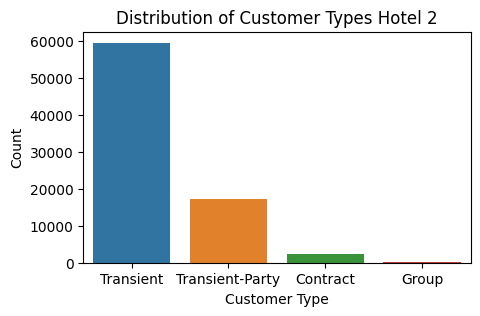

In [ ]:
plt.figure(figsize=(5, 3))
sns.countplot(data=H2, x='CustomerType')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.title('Distribution of Customer Types Hotel 2')
plt.show()


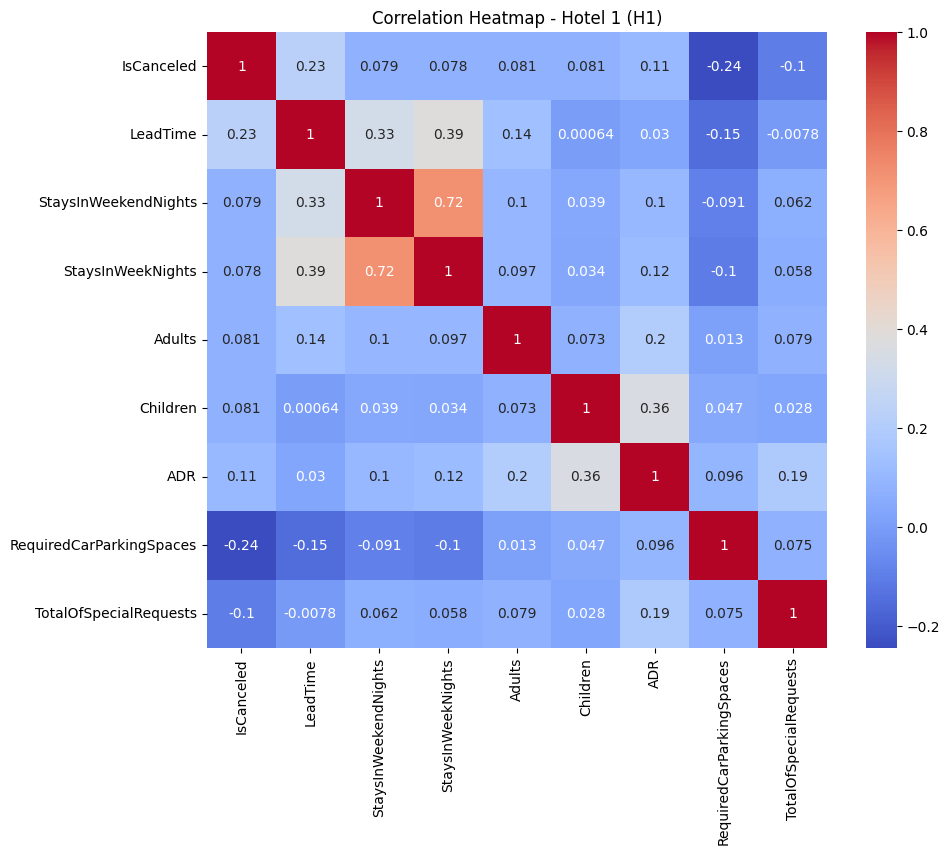

In [ ]:
# Select the columns for H1 heatmap
h1_heatmap_cols = ['IsCanceled', 'LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights',
                'Adults', 'Children', 'ADR', 'RequiredCarParkingSpaces',
                'TotalOfSpecialRequests', 'ReservationStatusDate']

# Create a correlation matrix for H1
h1_corr_matrix = H1[h1_heatmap_cols].corr()

# Plot the H1 heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(h1_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Hotel 1 (H1)')
plt.show()



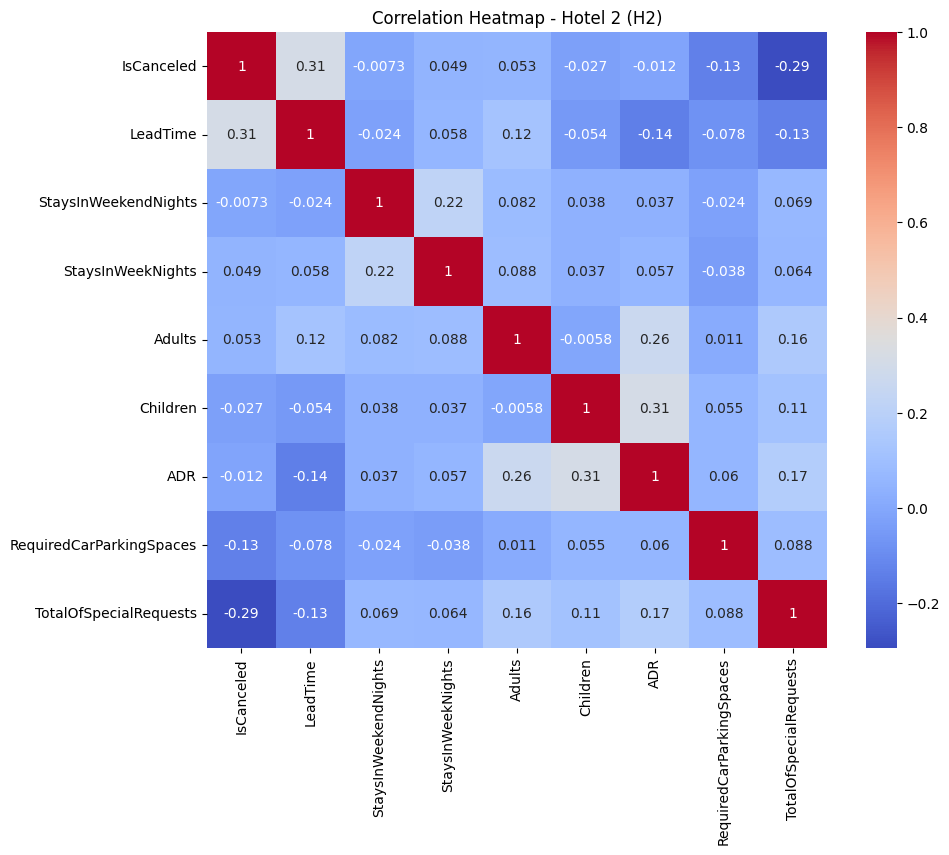

In [ ]:
# Select the columns for H2 heatmap
h2_heatmap_cols = ['IsCanceled', 'LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights',
                'Adults', 'Children', 'ADR', 'RequiredCarParkingSpaces',
                'TotalOfSpecialRequests', 'ReservationStatusDate']

# Create a correlation matrix for H2
h2_corr_matrix = H2[h2_heatmap_cols].corr()

# Plot the H2 heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(h2_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Hotel 2 (H2)')
plt.show()


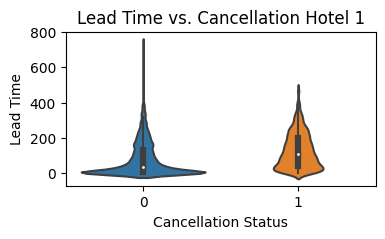

In [ ]:
plt.figure(figsize=(4, 2))
sns.violinplot(data=H1, x='IsCanceled', y='LeadTime')
plt.xlabel('Cancellation Status')
plt.ylabel('Lead Time')
plt.title('Lead Time vs. Cancellation Hotel 1')
plt.show()

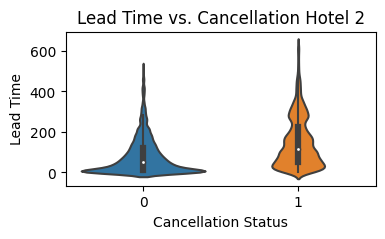

In [ ]:
plt.figure(figsize=(4, 2))
sns.violinplot(data=H2, x='IsCanceled', y='LeadTime')
plt.xlabel('Cancellation Status')
plt.ylabel('Lead Time')
plt.title('Lead Time vs. Cancellation Hotel 2')
plt.show()

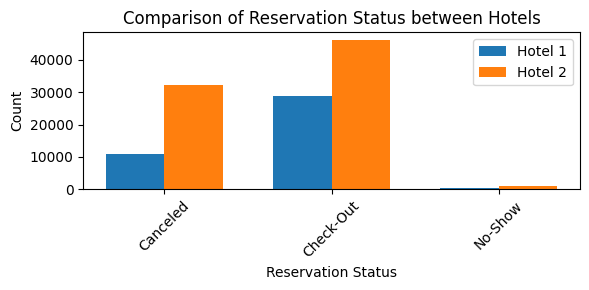

In [ ]:

hotel1_counts = H1['ReservationStatus'].value_counts()
hotel2_counts = H2['ReservationStatus'].value_counts()

# Reservation status
reservation_statuses = np.union1d(hotel1_counts.index, hotel2_counts.index)

# Bar Plot
bar_width = 0.35
index = np.arange(len(reservation_statuses))
plt.figure(figsize=(6, 3))
plt.bar(index, hotel1_counts.reindex(reservation_statuses), bar_width, label='Hotel 1')
plt.bar(index + bar_width, hotel2_counts.reindex(reservation_statuses), bar_width, label='Hotel 2')

plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.title('Comparison of Reservation Status between Hotels')
plt.legend()
plt.xticks(index + bar_width/2, reservation_statuses, rotation=45)
plt.tight_layout()
plt.show()

# 6. Feature Engineering

By creating the following features, we are providing the model with additional information that may be useful for predicting the cancellation of a booking. for example: The presence or absence of a company in a booking could potentially have an impact on the likelihood of cancellation. Including these features allows the model to capture any patterns or relationships between the presence of the features and the cancellation behavior.

### Creating hasCompany


In [ ]:
#for Hotel 1
H1['hasCompany'] = np.where(H1['Company'] != 'NULL', 1, 0)

In [ ]:
#for Hotel 2
H2['hasCompany'] = np.where(H2['Company'] != 'NULL', 1, 0)


### Create Feature hasAgent
similar to hasCompany we will create feature hasAgent

In [ ]:
# For Hotel 1
H1['hasAgent'] = np.where(H1['Agent'] != 'NULL', 1, 0)
# H1

In [ ]:
# For Hotel 2
H2['hasAgent'] = np.where(H2['Agent'] != 'NULL', 1, 0)
# H2

### IsDomestic
we will create feature is domestic to check if the guest are domestic or foreigner


In [ ]:
# For Hotel 1
H1['IsDomestic'] = np.where(H1['Country'] == 'PRT', 1, 0)
H1

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,hasCompany,hasAgent,IsDomestic
0,0,342,2015,July,27,1,0,0,2,0,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,0,1
1,0,737,2015,July,27,1,0,0,2,0,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,0,1
2,0,7,2015,July,27,1,0,1,1,0,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,0,0
3,0,13,2015,July,27,1,0,1,1,0,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,1,0
4,0,14,2015,July,27,1,0,2,2,0,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,0,212,2017,August,35,31,2,8,2,1,...,0,Transient,89.75,0,0,Check-Out,2017-09-10,0,1,0
40056,0,169,2017,August,35,30,2,9,2,0,...,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10,0,1,0
40057,0,204,2017,August,35,29,4,10,2,0,...,0,Transient,153.57,0,3,Check-Out,2017-09-12,0,1,0
40058,0,211,2017,August,35,31,4,10,2,0,...,0,Contract,112.80,0,1,Check-Out,2017-09-14,0,1,0


In [ ]:
# For Hotel 2
H2['IsDomestic'] = np.where(H2['Country'] == 'PRT', 1, 0)
H2

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,hasCompany,hasAgent,IsDomestic
0,0,6,2015,July,27,1,0,2,1,0.0,...,0,Transient,0.00,0,0,Check-Out,2015-07-03,0,1,1
1,1,88,2015,July,27,1,0,4,2,0.0,...,0,Transient,76.50,0,1,Canceled,2015-07-01,0,1,1
2,1,65,2015,July,27,1,0,4,1,0.0,...,0,Transient,68.00,0,1,Canceled,2015-04-30,0,1,1
3,1,92,2015,July,27,1,2,4,2,0.0,...,0,Transient,76.50,0,2,Canceled,2015-06-23,0,1,1
4,1,100,2015,July,27,2,0,2,2,0.0,...,0,Transient,76.50,0,1,Canceled,2015-04-02,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0.0,...,0,Transient,96.14,0,0,Check-Out,2017-09-06,0,1,0
79326,0,102,2017,August,35,31,2,5,3,0.0,...,0,Transient,225.43,0,2,Check-Out,2017-09-07,0,1,0
79327,0,34,2017,August,35,31,2,5,2,0.0,...,0,Transient,157.71,0,4,Check-Out,2017-09-07,0,1,0
79328,0,109,2017,August,35,31,2,5,2,0.0,...,0,Transient,104.40,0,0,Check-Out,2017-09-07,0,1,0


In [ ]:
H1.drop(['ArrivalDateYear', 'ArrivalDateDayOfMonth', 'ReservationStatus', 'ReservationStatusDate', 'Agent', 'Company', 'Country'], axis=1, inplace=True)


In [ ]:
print(H1.shape)

(40060, 27)


Next step we will drop unnecessary columns repeated columns

In [ ]:
H2.drop(['ArrivalDateYear', 'ArrivalDateDayOfMonth', 'ReservationStatus', 'ReservationStatusDate', 'Agent', 'Company', 'Country'], axis=1, inplace=True)


In [ ]:
H2

,IsCanceled,LeadTime,ArrivalDateMonth,ArrivalDateWeekNumber,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,...,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,hasCompany,hasAgent,IsDomestic
0,0,6,July,27,0,2,1,0.0,0,HB,...,0,No Deposit,0,Transient,0.00,0,0,0,1,1
1,1,88,July,27,0,4,2,0.0,0,BB,...,0,No Deposit,0,Transient,76.50,0,1,0,1,1
2,1,65,July,27,0,4,1,0.0,0,BB,...,0,No Deposit,0,Transient,68.00,0,1,0,1,1
3,1,92,July,27,2,4,2,0.0,0,BB,...,0,No Deposit,0,Transient,76.50,0,2,0,1,1
4,1,100,July,27,0,2,2,0.0,0,BB,...,0,No Deposit,0,Transient,76.50,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,August,35,2,5,2,0.0,0,BB,...,0,No Deposit,0,Transient,96.14,0,0,0,1,0
79326,0,102,August,35,2,5,3,0.0,0,BB,...,0,No Deposit,0,Transient,225.43,0,2,0,1,0
79327,0,34,August,35,2,5,2,0.0,0,BB,...,0,No Deposit,0,Transient,157.71,0,4,0,1,0
79328,0,109,August,35,2,5,2,0.0,0,BB,...,0,No Deposit,0,Transient,104.40,0,0,0,1,0


### We will perform one hot encoding on the categorical data

In [ ]:
Hotel1=pd.get_dummies(H1, drop_first=True)


In [ ]:
Hotel2=pd.get_dummies(H2, drop_first=True)


In [ ]:
### the new processed data

Hotel1.to_csv('Hotel1.csv', index=None)
Hotel2.to_csv('Hotel2.csv', index=None)

# 7. Modeling
After completing the preprocessing steps and preparing the data for analysis, the next step is to divide the data into a training set and a test set. We will allocate 20% of the data for the test set, while the remaining 80% will be used for training. This split allows us to evaluate the performance of different models on unseen data.

Once the data is split, we can proceed with selecting and comparing various models. We will consider different models such as logistic regression, decision trees, and random forests. These models have different characteristics and performance metrics.

To determine the best model, we will assess their performance using appropriate evaluation metrics, such as accuracy. The model with the highest accuracy on the test set will be chosen as the best model for predicting cancellations.

By comparing the models on the test set, we can make an informed decision about which model performs the best for our specific problem of predicting cancellations in the hotel dataset.

In [ ]:
#Load The Data
import pandas as pd
Hotel1=pd.read_csv('Hotel1.csv')
Hotel2=pd.read_csv('Hotel2.csv')

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Modeling for Hotel 1
# Split the data into independent (X) and dependent (y) variables for Hotel 1
X_hotel1 = Hotel1.drop('IsCanceled', axis=1)  # independent variables for Hotel 1
y_hotel1 = Hotel1['IsCanceled']  # dependent variable for Hotel 1
# Split the data into training and test sets for Hotel 1
X_train_hotel1, X_test_hotel1, y_train_hotel1, y_test_hotel1 = train_test_split(X_hotel1, y_hotel1, test_size=0.2, random_state=123)

# Logistic Regression for Hotel 1
logistic_model_hotel1 = LogisticRegression()
logistic_model_hotel1.fit(X_train_hotel1, y_train_hotel1)
logistic_predictions_hotel1 = logistic_model_hotel1.predict(X_test_hotel1)

# Decision Tree for Hotel 1
decision_tree_model_hotel1 = DecisionTreeClassifier()
decision_tree_model_hotel1.fit(X_train_hotel1, y_train_hotel1)
decision_tree_predictions_hotel1 = decision_tree_model_hotel1.predict(X_test_hotel1)

# Random Forest for Hotel 1
random_forest_model_hotel1 = RandomForestClassifier()
random_forest_model_hotel1.fit(X_train_hotel1, y_train_hotel1)
random_forest_predictions_hotel1 = random_forest_model_hotel1.predict(X_test_hotel1)

# Evaluate the models for Hotel 1
logistic_accuracy_hotel1 = accuracy_score(y_test_hotel1, logistic_predictions_hotel1)
logistic_precision_hotel1 = precision_score(y_test_hotel1, logistic_predictions_hotel1)
logistic_recall_hotel1 = recall_score(y_test_hotel1, logistic_predictions_hotel1)
logistic_f1_hotel1 = f1_score(y_test_hotel1, logistic_predictions_hotel1)

decision_tree_accuracy_hotel1 = accuracy_score(y_test_hotel1, decision_tree_predictions_hotel1)
decision_tree_precision_hotel1 = precision_score(y_test_hotel1, decision_tree_predictions_hotel1)
decision_tree_recall_hotel1 = recall_score(y_test_hotel1, decision_tree_predictions_hotel1)
decision_tree_f1_hotel1 = f1_score(y_test_hotel1, decision_tree_predictions_hotel1)

random_forest_accuracy_hotel1 = accuracy_score(y_test_hotel1, random_forest_predictions_hotel1)
random_forest_precision_hotel1 = precision_score(y_test_hotel1, random_forest_predictions_hotel1)
random_forest_recall_hotel1 = recall_score(y_test_hotel1, random_forest_predictions_hotel1)
random_forest_f1_hotel1 = f1_score(y_test_hotel1, random_forest_predictions_hotel1)

# Compare the performance of the models for Hotel 1
print("Hotel 1 - Logistic Regression Metrics:")
print("Accuracy:", logistic_accuracy_hotel1)
print("Precision:", logistic_precision_hotel1)
print("Recall:", logistic_recall_hotel1)
print("F1-score:", logistic_f1_hotel1)
print()

print("Hotel 1 - Decision Tree Metrics:")
print("Accuracy:", decision_tree_accuracy_hotel1)
print("Precision:", decision_tree_precision_hotel1)
print("Recall:", decision_tree_recall_hotel1)
print("F1-score:", decision_tree_f1_hotel1)
print()

print("Hotel 1 - Random Forest Metrics:")
print("Accuracy:", random_forest_accuracy_hotel1)
print("Precision:", random_forest_precision_hotel1)
print("Recall:", random_forest_recall_hotel1)
print("F1-score:", random_forest_f1_hotel1)
print()

/Users/amani/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Hotel 1 - Logistic Regression Metrics:
Accuracy: 0.8346230654018971
Precision: 0.7404667046101309
Recall: 0.5995391705069124
F1-score: 0.662592309651133

Hotel 1 - Decision Tree Metrics:
Accuracy: 0.8628307538691962
Precision: 0.7387427552385198
Recall: 0.7635944700460829
F1-score: 0.7509630636755041

Hotel 1 - Random Forest Metrics:
Accuracy: 0.9068896655017474
Precision: 0.8479960899315738
Recall: 0.7995391705069125
F1-score: 0.823055028462998



Now We will do the same to Hotel 2

In [ ]:

# Modeling for Hotel 2
# Split the data into independent (X) and dependent (y) variables for Hotel 2
X_hotel2 = Hotel2.drop('IsCanceled', axis=1)  # independent variables for Hotel 2
y_hotel2 = Hotel2['IsCanceled']  # dependent variable for Hotel 2
# Split the data into training and test sets for Hotel 2
X_train_hotel2, X_test_hotel2, y_train_hotel2, y_test_hotel2 = train_test_split(X_hotel2, y_hotel2, test_size=0.2, random_state=100)

# Logistic Regression for Hotel 2
logistic_model_hotel2 = LogisticRegression(random_state=100)
logistic_model_hotel2.fit(X_train_hotel2, y_train_hotel2)
logistic_predictions_hotel2 = logistic_model_hotel2.predict(X_test_hotel2)

# Decision Tree for Hotel 2
decision_tree_model_hotel2 = DecisionTreeClassifier(random_state=100)
decision_tree_model_hotel2.fit(X_train_hotel2, y_train_hotel2)
decision_tree_predictions_hotel2 = decision_tree_model_hotel2.predict(X_test_hotel2)

# Random Forest for Hotel 2
random_forest_model_hotel2 = RandomForestClassifier(random_state=100)
random_forest_model_hotel2.fit(X_train_hotel2, y_train_hotel2)
random_forest_predictions_hotel2 = random_forest_model_hotel2.predict(X_test_hotel2)

# Evaluate the models for Hotel 2
logistic_accuracy_hotel2 = accuracy_score(y_test_hotel2, logistic_predictions_hotel2)
logistic_precision_hotel2 = precision_score(y_test_hotel2, logistic_predictions_hotel2)
logistic_recall_hotel2 = recall_score(y_test_hotel2, logistic_predictions_hotel2)
logistic_f1_hotel2 = f1_score(y_test_hotel2, logistic_predictions_hotel2)

decision_tree_accuracy_hotel2 = accuracy_score(y_test_hotel2, decision_tree_predictions_hotel2)
decision_tree_precision_hotel2 = precision_score(y_test_hotel2, decision_tree_predictions_hotel2)
decision_tree_recall_hotel2 = recall_score(y_test_hotel2, decision_tree_predictions_hotel2)
decision_tree_f1_hotel2 = f1_score(y_test_hotel2, decision_tree_predictions_hotel2)

random_forest_accuracy_hotel2 = accuracy_score(y_test_hotel2, random_forest_predictions_hotel2)
random_forest_precision_hotel2 = precision_score(y_test_hotel2, random_forest_predictions_hotel2)
random_forest_recall_hotel2 = recall_score(y_test_hotel2, random_forest_predictions_hotel2)
random_forest_f1_hotel2 = f1_score(y_test_hotel2, random_forest_predictions_hotel2)

# Compare the performance of the models for Hotel 2
print("Hotel 2 - Logistic Regression Metrics:")
print("Accuracy:", logistic_accuracy_hotel2)
print("Precision:", logistic_precision_hotel2)
print("Recall:", logistic_recall_hotel2)
print("F1-score:", logistic_f1_hotel2)
print()

print("Hotel 2 - Decision Tree Metrics:")
print("Accuracy:", decision_tree_accuracy_hotel2)
print("Precision:", decision_tree_precision_hotel2)
print("Recall:", decision_tree_recall_hotel2)
print("F1-score:", decision_tree_f1_hotel2)
print()

print("Hotel 2 - Random Forest Metrics:")
print("Accuracy:", random_forest_accuracy_hotel2)
print("Precision:", random_forest_precision_hotel2)
print("Recall:", random_forest_recall_hotel2)
print("F1-score:", random_forest_f1_hotel2)
print()

/Users/amani/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Hotel 2 - Logistic Regression Metrics:
Accuracy: 0.7944031261817723
Precision: 0.7980054397098821
Recall: 0.6720109940448924
F1-score: 0.7296087533156499

Hotel 2 - Decision Tree Metrics:
Accuracy: 0.8408546577587294
Precision: 0.8054037644201578
Recall: 0.8102000305390136
F1-score: 0.8077947781076349

Hotel 2 - Random Forest Metrics:
Accuracy: 0.8774108155804866
Precision: 0.8845639826261277
Recall: 0.8085203847915712
F1-score: 0.8448344635021938



In the code below we will display the key factors that impact hotel bookings/cancellation

Hotel 1 - Top 5 Important Features:
                     Feature  Importance
0                   LeadTime    0.161395
12                       ADR    0.103895
17                IsDomestic    0.102177
1      ArrivalDateWeekNumber    0.066322
13  RequiredCarParkingSpaces    0.054072


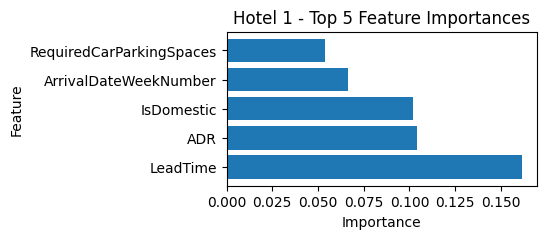

In [ ]:
import matplotlib.pyplot as plt
# Feature Importance for Hotel 1
importances_hotel1 = random_forest_model_hotel1.feature_importances_
# Create a DataFrame with feature names and their importances for Hotel 1
feature_importances_hotel1 = pd.DataFrame({'Feature': X_train_hotel1.columns, 'Importance': importances_hotel1})
# Save feature importances to a CSV file
feature_importances_hotel1.to_csv('feature_importances_hotel1.csv', index=False)
# Sort the features by importance in descending order for Hotel 1
feature_importances_hotel1 = feature_importances_hotel1.sort_values(by='Importance', ascending=False)
# Select the top features for Hotel 1
top_feature_importances_hotel1 = feature_importances_hotel1.head(5)
# Print the most important features for Hotel 1
print("Hotel 1 - Top", 5, "Important Features:")
print(top_feature_importances_hotel1)

# Plot the feature importances for Hotel 1
plt.figure(figsize=(4, 2))
plt.barh(top_feature_importances_hotel1['Feature'], top_feature_importances_hotel1['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Hotel 1 - Top 5 Feature Importances')
plt.show()


Hotel 2 - Top 5 Important Features:
                   Feature  Importance
0                 LeadTime    0.157417
58  DepositType_Non Refund    0.129928
12                     ADR    0.108722
14  TotalOfSpecialRequests    0.076281
1    ArrivalDateWeekNumber    0.071445


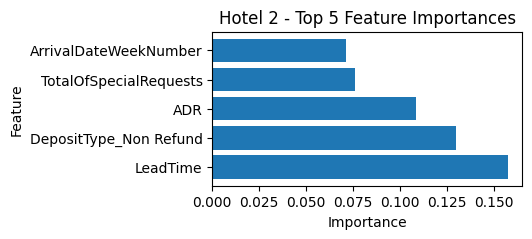

In [ ]:

# Feature Importance for Hotel 2
importances_hotel2 = random_forest_model_hotel2.feature_importances_
# Create a DataFrame with feature names and their importances for Hotel 2
feature_importances_hotel2 = pd.DataFrame({'Feature': X_train_hotel2.columns, 'Importance': importances_hotel2})
# Save feature importances to a CSV file
feature_importances_hotel2.to_csv('feature_importances_hotel2.csv', index=False)
# Sort the features by importance in descending order for Hotel 2
feature_importances_hotel2 = feature_importances_hotel2.sort_values(by='Importance', ascending=False)
# Select the top features for Hotel 2
top_feature_importances_hotel2 = feature_importances_hotel2.head(5)
# Print the most important features for Hotel 2
print("Hotel 2 - Top", 5, "Important Features:")
print(top_feature_importances_hotel2)
# Plot the feature importances for Hotel 2
plt.figure(figsize=(4, 2))
plt.barh(top_feature_importances_hotel2['Feature'], top_feature_importances_hotel2['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Hotel 2 - Top 5 Feature Importances')
plt.show()

# 8. DISCUSSION

1. Decision Tree model has the highest accuracy for both Hotel 1 and Hotel 2, followed by the Decision Tree Model and the Logistic Regression. It appears that the Decision Tree model performs the best among the three models considered.

2. The Random Forest Model will be used to determine the top 5 key factors affecting hotel bookings.
3. Based on the modeling of Hotel 1 and Hotel 2, the two key factors that have a significant impact on hotel bookings are Lead Time.
4. Lead time is the gap of a period where guests check in the rooms and the date bookings. From the EDA part, the shorter time of bookings lead to higher cancellations.
5. The recommendation for future research were developed as a result of this project such as apply overbooking strategy. Hotel overbooking strategy is a revenue management technique that hotels use to maximize occupancy and revenue by accepting more reservations than the available rooms considering the potential cancellations or no-shows. 

# 9. CONCLUSION


In the hospitality industry, understanding the factors that influence hotel bookings is crucial for optimizing revenue.
By applying this machine learning technique, it can help hotel owners make informed decisions and plan strategies to maximize profitability, manage cancellations effectively, enhance the overall guest experience, and achieve long-term success in the competitive market.

# 10. DEPLOYMENT

[Hotel_Cancellation_Prediction](https://amani1-1996-model-model-ixlw2s.streamlit.app/)